In [59]:
!!pip install wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Read in CSV
cleanfile = pd.read_csv("cleaned_BMI_data.csv")
cleanfile.columns

Index(['Entity', 'Code', 'Year', 'Men Overweight or Obese (%)', 'Men (BMI)',
       'Women overweight or obese (%)', 'Women (BMI)',
       'Daily caloric supply (per person) (kcal/person/day)',
       'Total population (Gapminder)', 'HIV/AIDS and tuberculosis (DALYs)',
       'Diarrhea & common infectious diseases (DALYs)',
       'Malaria & neglected tropical diseases (DALYs)',
       'Maternal disorders (DALYs)', 'Neonatal disorders (DALYs)',
       'Nutritional deficiencies (DALYs)',
       'Other communicable diseases (DALYs)', 'Cancers (DALYs)',
       'Cardiovascular diseases (DALYs)', 'Respiratory diseases (DALYs)',
       'Liver diseases (DALYs)', 'Digestive diseases (DALYs)',
       'Neurological disorders (DALYs)',
       'Mental and substance use disorders (DALYs)',
       'Diabetes, blood, & endocrine diseases (DALYs)',
       'Musculoskeletal disorders (DALYs)', 'Other NCDs (DALYs)',
       'Transport injuries (DALYs)', 'Natural disasters (DALYs)',
       'Conflict and ter

In [3]:
cleanfile["Normalized Cardiovascular DALYs"] = (cleanfile["Cardiovascular diseases (DALYs)"] / cleanfile["Total population (Gapminder)"])*365

In [4]:
bmi_disease = cleanfile[["Entity" , "Year", "% Adults > 25BMI", "Normalized Cardiovascular DALYs"]]
bmi_disease.head(10)

,Entity,Year,% Adults > 25BMI,Normalized Cardiovascular DALYs
0,Afghanistan,2013,18.1,21.919075
1,Albania,2013,56.5,23.954886
2,Algeria,2013,57.2,12.692618
3,Angola,2013,22.1,9.813773
4,Antigua and Barbuda,2013,46.4,12.237517
5,Argentina,2013,61.6,15.845620
6,Armenia,2013,53.3,25.659761
7,Australia,2013,65.5,10.161579
8,Austria,2013,56.6,17.804019
9,Azerbaijan,2013,50.6,27.742313


In [5]:
# Isolate US Data as a dataframe
us_data = bmi_disease.loc[bmi_disease["Entity"] == "United States", :]
us_data

,Entity,Year,% Adults > 25BMI,Normalized Cardiovascular DALYs
161,United States,2013,68.6,15.984362


In [7]:
# Is there a higher prevalence of being overweight or obesity in the US than the rest of the world?
world_prevmean = bmi_disease["% Adults > 25BMI"].mean()
world_prevmean

46.125

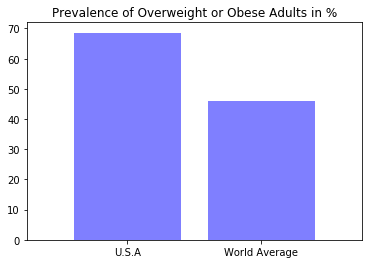

In [8]:
BMI = [us_data["% Adults > 25BMI"], world_prevmean]
x_axis = np.arange(len(BMI))
plt.bar(x_axis, BMI, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["U.S.A", "World Average"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Prevalence of Overweight or Obese Adults in %")
plt.savefig("USvsWorld.png")

In [28]:
# Narrow down the dataframe to country and cardiovascular DALYs, sort and bin
country_card = bmi_disease[["Entity", "% Adults > 25BMI", "Normalized Cardiovascular DALYs"]]
sorted_country_card = country_card.sort_values(by = ["% Adults > 25BMI"], ascending=False)
sorted_country_card["Category"] = pd.qcut(sorted_country_card["% Adults > 25BMI"], 3, labels=["Lower", "Mid", "Upper"])
sorted_country_card.head(8)

,Entity,% Adults > 25BMI,Normalized Cardiovascular DALYs,Category
81,Kiribati,76.7,29.672410,Upper
130,Samoa,73.8,19.074449,Upper
82,Kuwait,70.2,8.728495,Upper
97,Malta,68.8,17.669058,Upper
161,United States,68.6,15.984362,Upper
132,Saudi Arabia,66.4,9.011762,Upper
110,New Zealand,66.4,11.749262,Upper
27,Canada,65.8,12.038686,Upper


In [48]:
sorted_country_card.dropna()

,Entity,% Adults > 25BMI,Normalized Cardiovascular DALYs,Category
81,Kiribati,76.7,29.672410,Upper
130,Samoa,73.8,19.074449,Upper
82,Kuwait,70.2,8.728495,Upper
97,Malta,68.8,17.669058,Upper
161,United States,68.6,15.984362,Upper
132,Saudi Arabia,66.4,9.011762,Upper
110,New Zealand,66.4,11.749262,Upper
27,Canada,65.8,12.038686,Upper
7,Australia,65.5,10.161579,Upper
141,Spain,65.4,12.685531,Upper


In [73]:
upper_bmi =sorted_country_card.loc[sorted_country_card["Category"] == "Upper", ["% Adults > 25BMI"]]
mid_bmi =sorted_country_card.loc[sorted_country_card["Category"] == "Mid", ["% Adults > 25BMI"]]
lower_bmi =sorted_country_card.loc[sorted_country_card["Category"] == "Lower", ["% Adults > 25BMI"]]
upper_bmi.max(), upper_bmi.min(), mid_bmi.max(), mid_bmi.min(), lower_bmi.max(), lower_bmi.min()


(% Adults > 25BMI    76.7
 dtype: float64, % Adults > 25BMI    58.9
 dtype: float64, % Adults > 25BMI    58.5
 dtype: float64, % Adults > 25BMI    36.8
 dtype: float64, % Adults > 25BMI    35.2
 dtype: float64, % Adults > 25BMI    16.0
 dtype: float64)

,% Adults > 25BMI
81,76.7
130,73.8
82,70.2
97,68.8
161,68.6
132,66.4
110,66.4
27,65.8
7,65.5
141,65.4


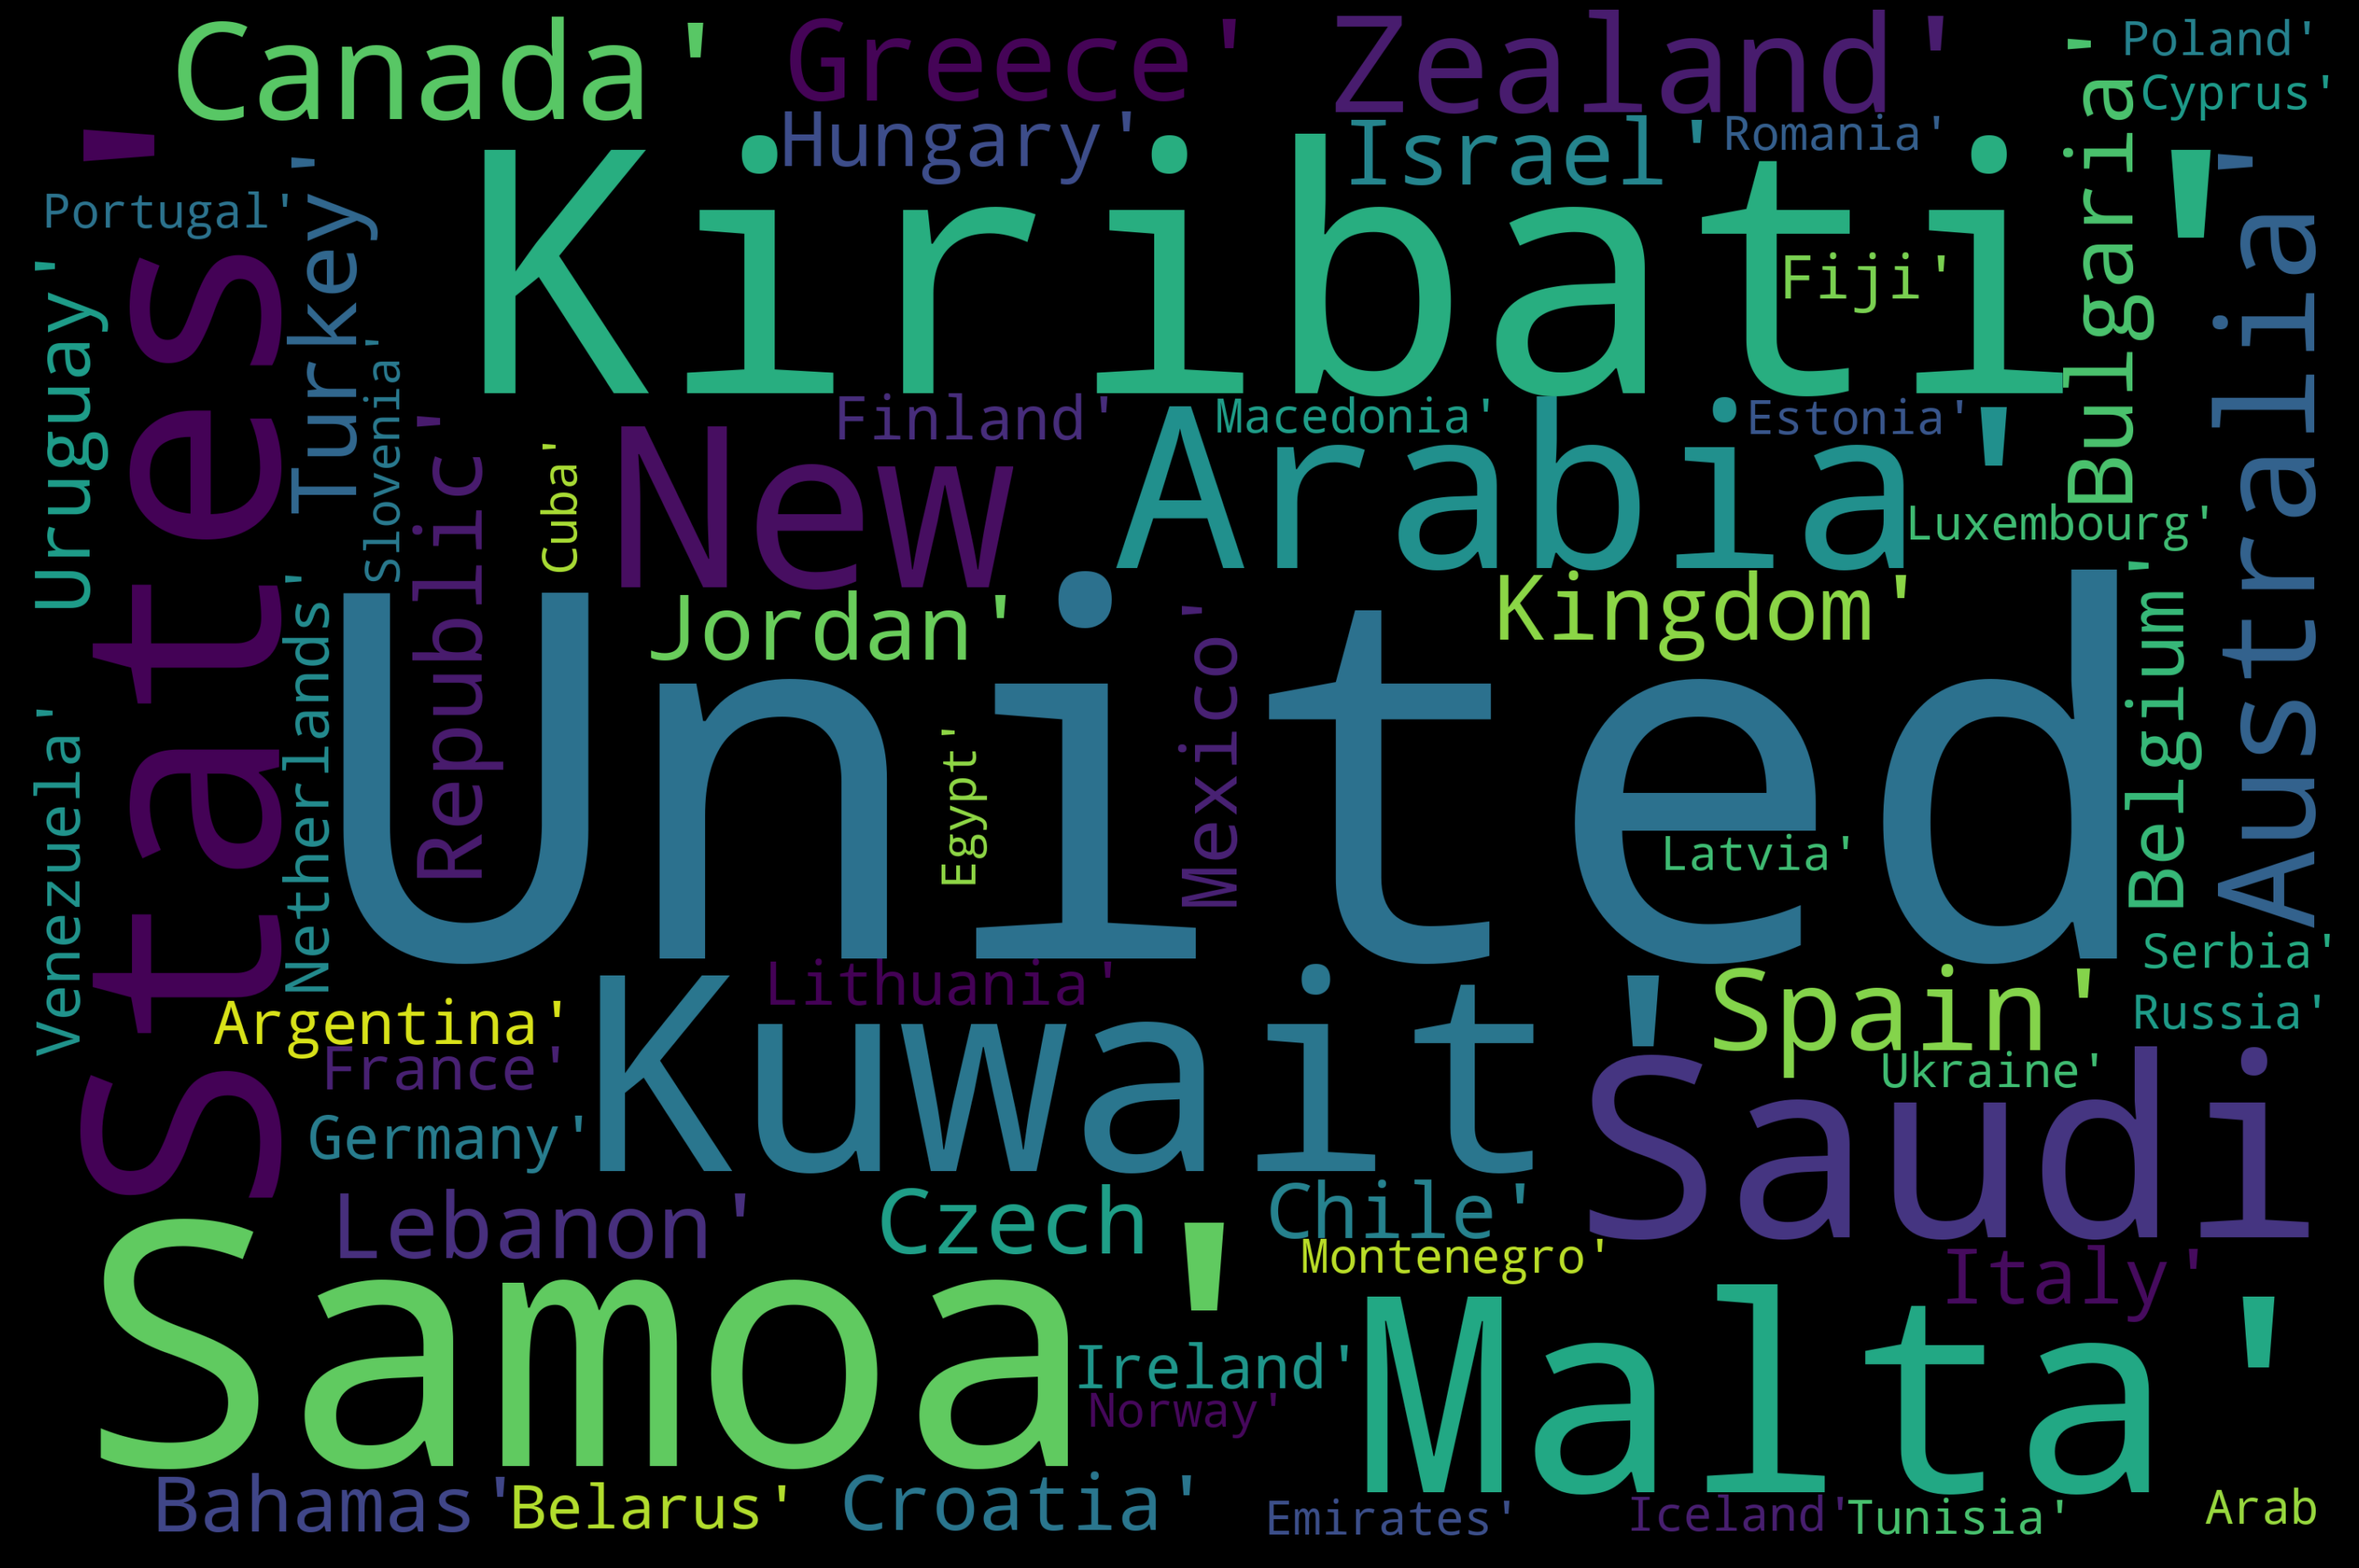

<Figure size 432x288 with 0 Axes>

In [88]:
text = sorted_country_card.loc[sorted_country_card["Category"] == "Upper", ["Entity"]].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig("Upper_worldcloud.png", format="png")

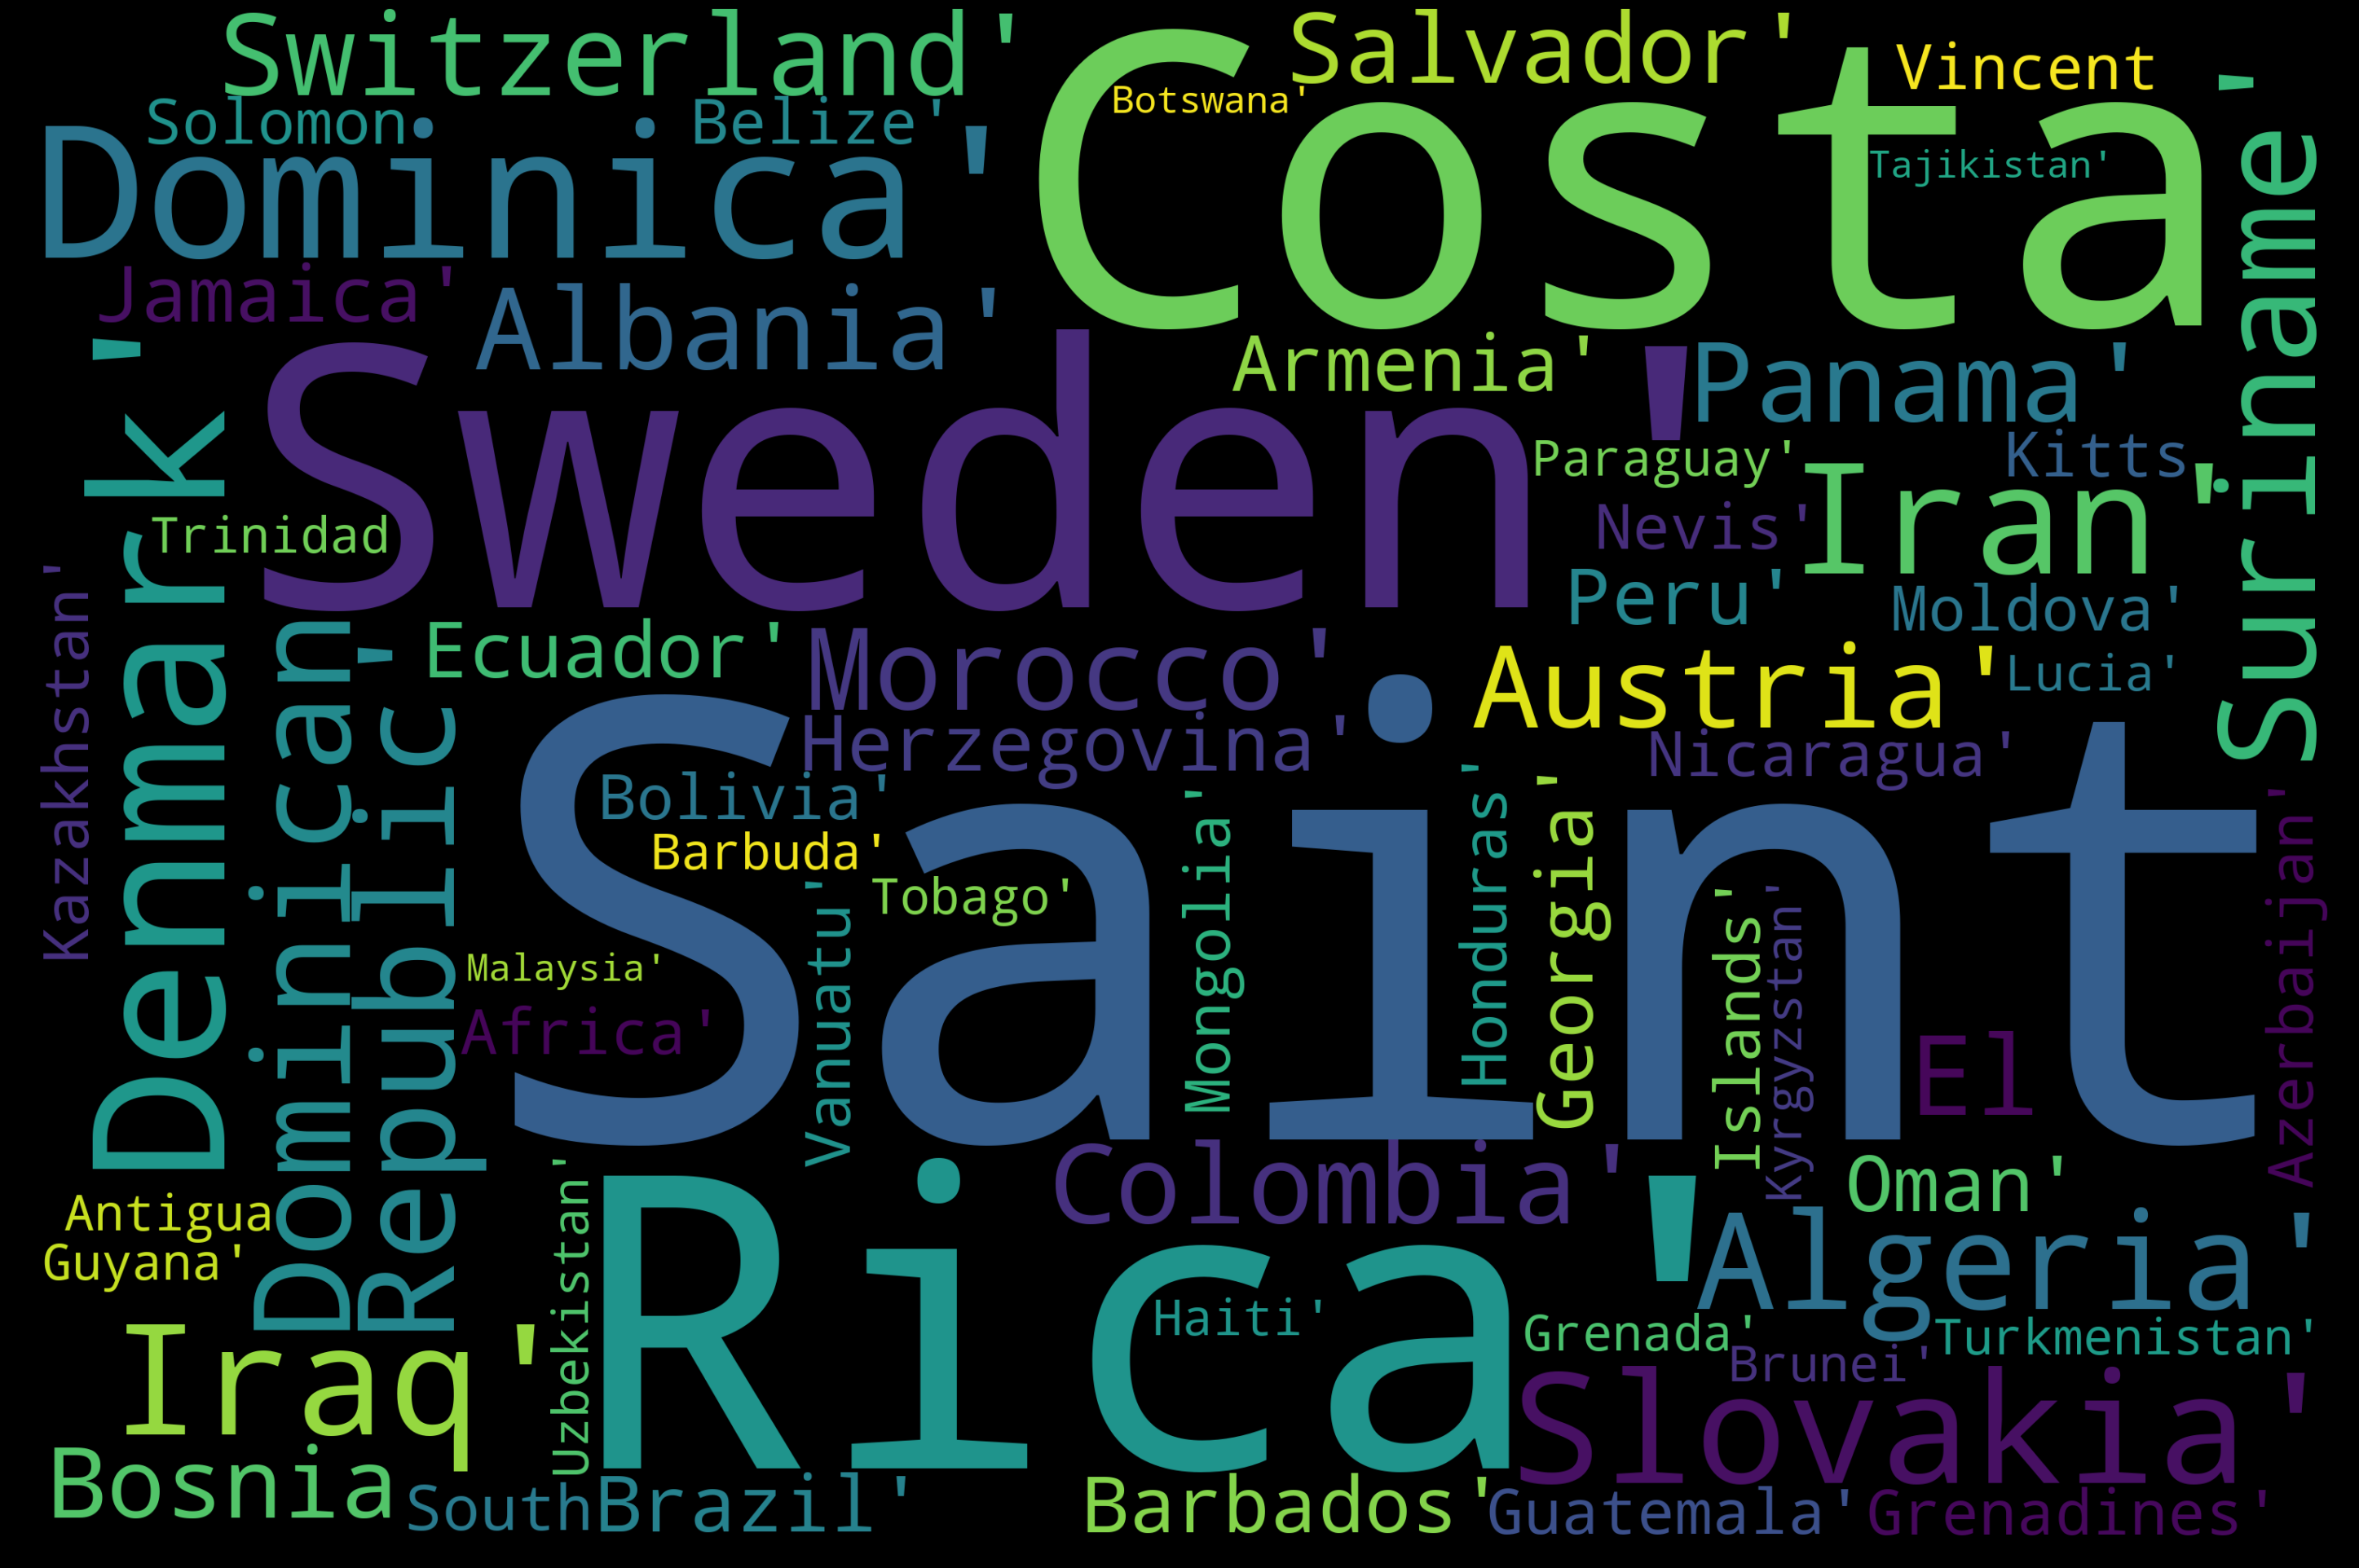

<Figure size 432x288 with 0 Axes>

In [85]:
text = sorted_country_card.loc[sorted_country_card["Category"] == "Mid", ["Entity"]].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
cloud("Mid_WorldCloud.png")

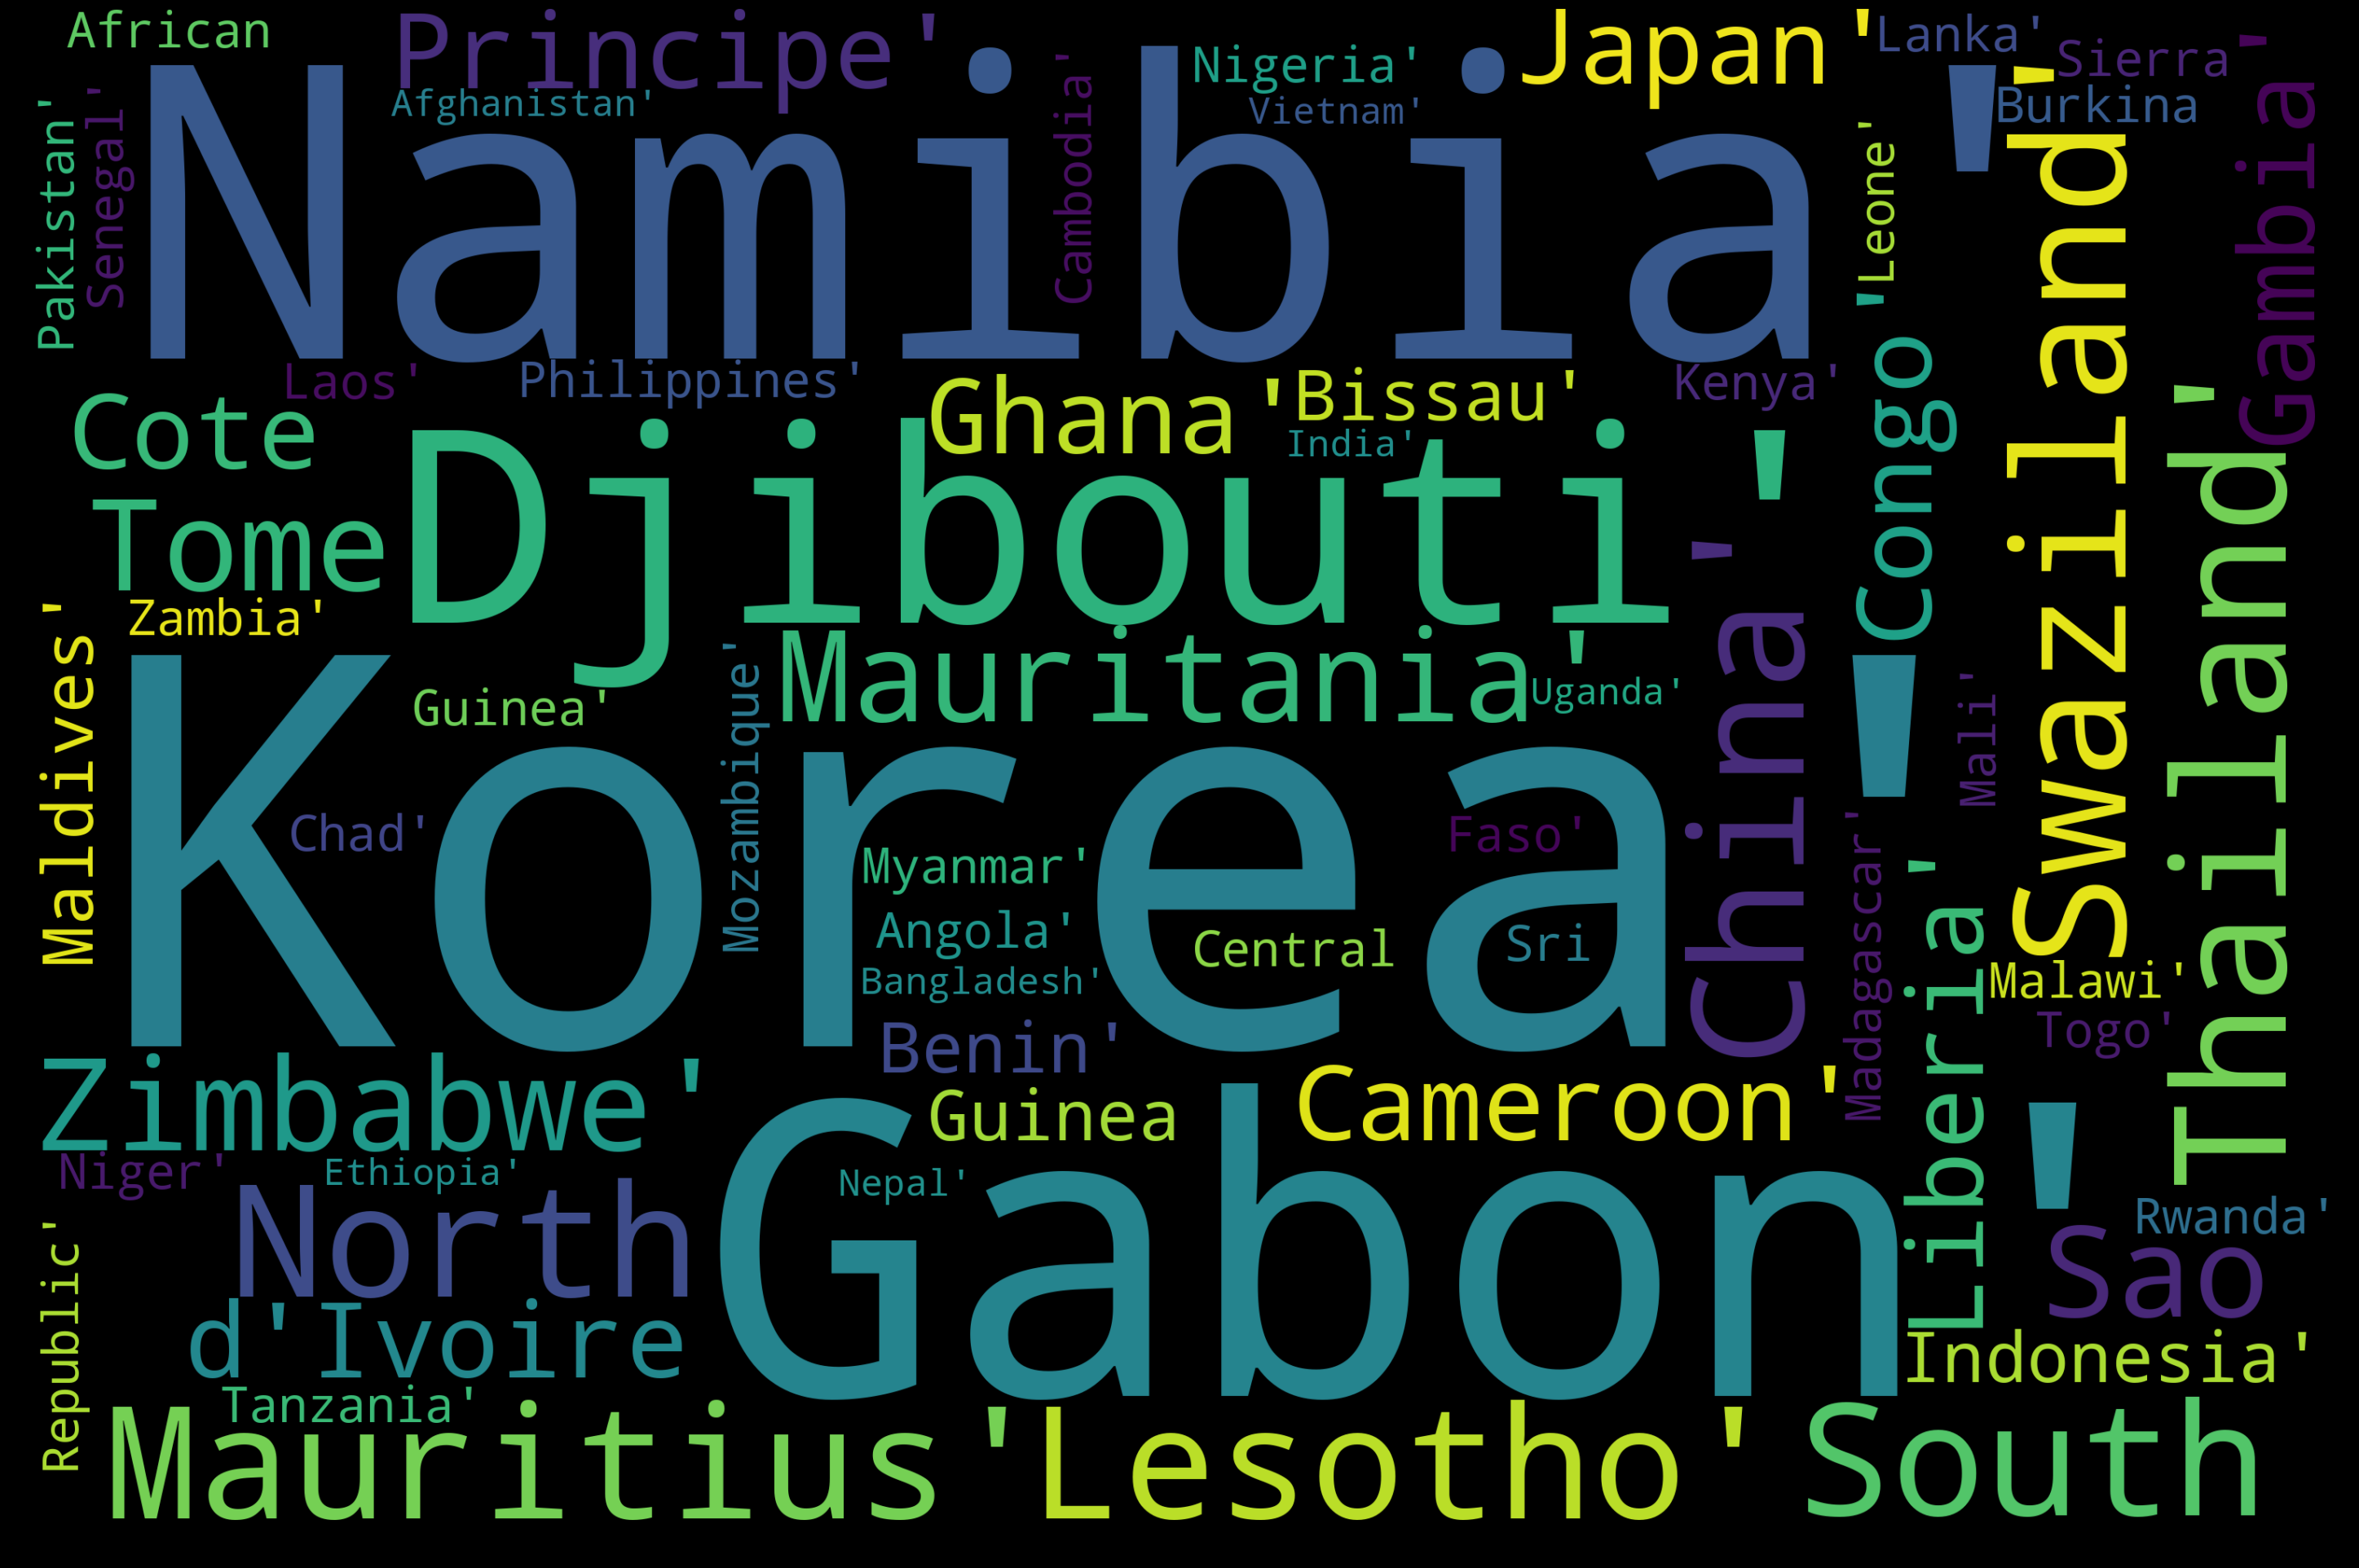

<Figure size 432x288 with 0 Axes>

In [82]:
text = sorted_country_card.loc[sorted_country_card["Category"] == "Lower", ["Entity"]].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig("Lower_WorldCloud.png")

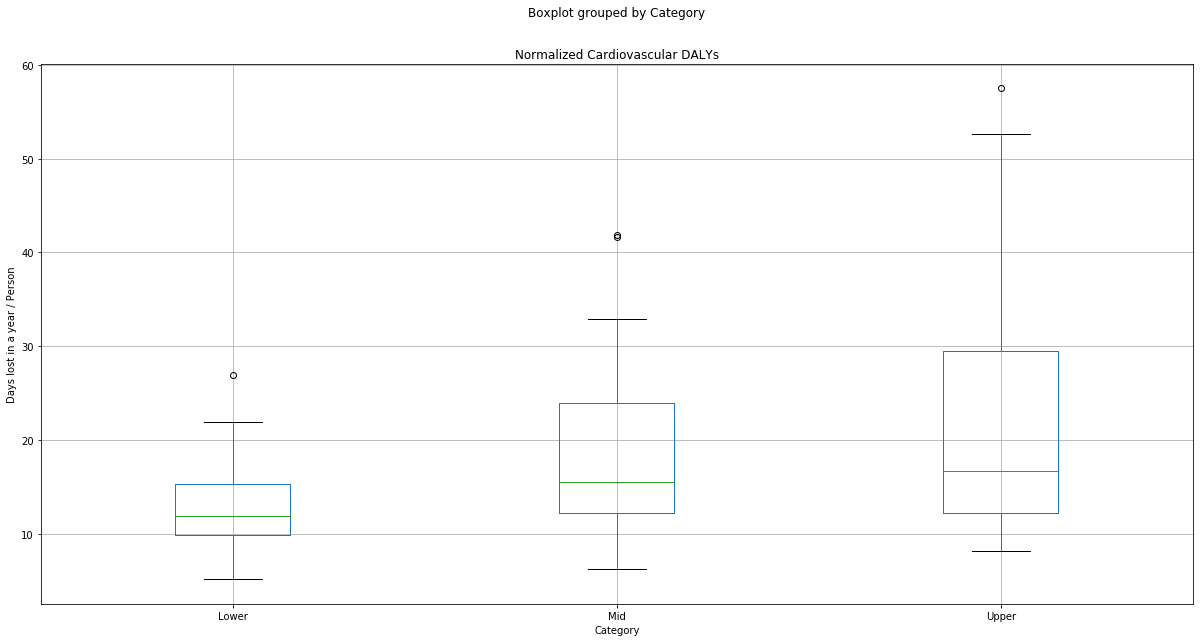

In [56]:
sorted_country_card.boxplot("Normalized Cardiovascular DALYs", by="Category", figsize=(20, 10))
plt.ylabel('Days lost in a year / Person')
plt.savefig("Normalized_Cardiovascular_DALYs.png")



In [90]:
# Test the null hypothesis if prevalence of overweight or obese adults have an effect on DALYs caused by cardiovascular diseases
upper = sorted_country_card.loc[sorted_country_card["Category"] == "Upper", ["% Adults > 25BMI"]]
mid = sorted_country_card.loc[sorted_country_card["Category"] == "Mid", ["% Adults > 25BMI"]]
lower = sorted_country_card.loc[sorted_country_card["Category"] == "Lower", ["% Adults > 25BMI"]]
stats.f_oneway(upper, mid, lower)


F_onewayResult(statistic=array([900.39553962]), pvalue=array([3.89884719e-88]))